Table of Content
1. Loading Datasets
2. Understanding the Data
3. Preprocessing the data:
    3.1 Removing ID Column from the dataset
    3.2 Merging the two datasets
    3.3 Columns' Types
    3.4 Missing Data
    3.5 Statistical Analysis:
        3.5.1 Descriptive Analysis:
        3.5.1.1 Numerical Features Analysis
        3.5.1.2 Categorical Features Analysis
        3.5.1.2.1 Removing Duplicate Vins
        3.5.1.2.2 Handling States' names
        3.5.1.2.3 Uppercase the other Columns
        3.5.1.2.4 Dividing into Old and New sets
        3.5.1.2.5 Excluding relatively not used cars
        3.5.1.2.6 Removing Vin Column
4. Feature Engineering:
    4.1 Car Usage Levels
    4.2 City Importance
    4.3 Added Features Plotting
5Answering Questions:
    5.1 Is the distribution of the offered cars differs from the new and old ones according to the city of the seller?
    5.2 Is the distribution of the offered cars differs from the new and old ones according to the State of the seller?
    5.3 Is There is any differences in the Price between the old and the new cars?
    5.4 The Price of the car affected by the State of the seller ?
    5.5 How the Prices of the cars are changed according to the year of manufacturing?
    5.6 There is any relation between the Year and the Milage?
    5.7 What is the distribution of the cars in the market?
    5.8 How the Price of a certain brand cars' changes according the year of manufacturing?
    5.9 Is there is any relationship between Mileage, Year and Price?
6. Dividing and Saving data

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading dataset

In [6]:
data1 = pd.read_csv('true_car_listings.csv')

In [7]:
data1.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [8]:
data2 = pd.read_csv("tc20171021.csv",sep ='\n')
data2.head()
data2.columns

Index(['Id,Price,Year,Mileage,City,State,Vin,Make,Model'], dtype='object')

In [9]:
data2 = data2['Id,Price,Year,Mileage,City,State,Vin,Make,Model'].str.split(',', expand=True)

In [10]:
data2 = data2.iloc[:, :-2]
cols =['Id','Price','Year','Mileage','City','State','Vin','Make','Model']
data2.columns=cols

In [11]:
data2.head()

,Id,Price,Year,Mileage,City,State,Vin,Make,Model
0,1,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,2,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,3,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,4,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,5,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience


Understanding the Data

In [ ]:
#Understanding the data
#The two datasets which have been provided to us tells the selling price of a used car along with its features like mileage
#year of selling of the car, location and the model

Data Preprocessing

In [12]:
#removing id col from ds2
data2.drop('Id', inplace=True, axis=1)

In [13]:
#merging 2 ds
final = pd.concat([data1,data2])
final.reset_index(drop= True)

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic
...,...,...,...,...,...,...,...,...
2085159,79900,2017,25,East Hanover,NJ,YV4BC0ZX0H1128239,Volvo,XC90T8
2085160,80895,2017,10,Corte Madera,CA,YV4BC0ZX0H1124188,Volvo,XC90T8
2085161,68755,2018,2500,Englewood,NJ,YV4A22PL4J1212676,Volvo,XC90T6
2085162,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6


In [14]:
#checking col types
final.dtypes

Price      object
Year       object
Mileage    object
City       object
State      object
Vin        object
Make       object
Model      object
dtype: object

In [15]:
A=['Price','Year','Mileage']
B=['City','State','Vin','Make','Model']
for i in A:
    final[i] = final[i].astype(int)
for j in B:
    final[j] = final[j].astype(str)

In [16]:
final.dtypes

Price       int64
Year        int64
Mileage     int64
City       object
State      object
Vin        object
Make       object
Model      object
dtype: object

In [17]:
#missing values
final.isnull().sum() 

Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

In [18]:
#analysis
final.describe()

,Price,Year,Mileage
count,2.085164e+06,2.085164e+06,2.085164e+06
mean,2.123977e+04,2.013310e+03,5.266388e+04
std,1.333097e+04,3.420197e+00,6.813271e+04
min,1.500000e+03,1.997000e+03,5.000000e+00
25%,1.299800e+04,2.012000e+03,2.391900e+04
50%,1.823900e+04,2.014000e+03,4.039300e+04
75%,2.691300e+04,2.016000e+03,7.231000e+04
max,4.995000e+05,2.018000e+03,7.758776e+07


In [19]:
price = final.Price.unique()
price.sort()
price

array([  1500,   1511,   1524, ..., 490000, 499000, 499500])

(array([278148., 925147., 512572., 238268.,  79195.,  31197.,   9343.,
          3832.,   1961.,   1553.]),
 array([     0.,  10000.,  20000.,  30000.,  40000.,  50000.,  60000.,
         70000.,  80000.,  90000., 100000.]),
 <a list of 10 Patch objects>)

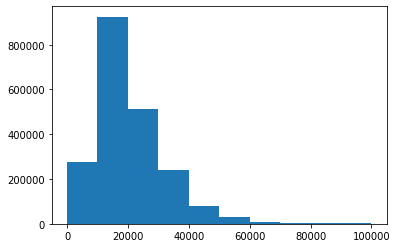

In [20]:
plt.hist(final['Price'], range =[0, 100000])

In [21]:
year = final.Year.unique()
year.sort()
year

array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

(array([  6317.,  11040.,  22947.,  46804.,  88110., 106749., 164986.,
        303673., 772865., 561673.]),
 array([1997. , 1999.1, 2001.2, 2003.3, 2005.4, 2007.5, 2009.6, 2011.7,
        2013.8, 2015.9, 2018. ]),
 <a list of 10 Patch objects>)

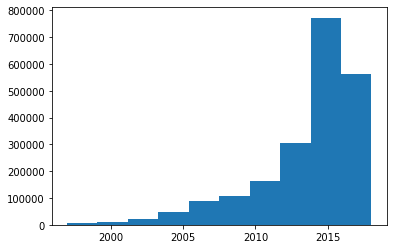

In [22]:
plt.hist(final['Year'])

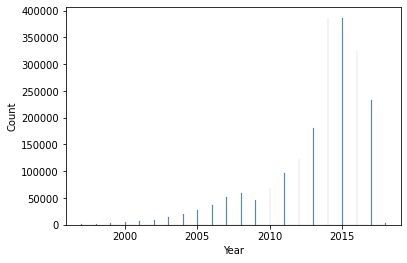

In [23]:
sns.histplot(final['Year'])

In [27]:
mileage = final.Mileage.unique()
mileage.sort()
mileage


array([       5,        6,        7, ...,  2457832,  2856196, 77587763])

Text(0.5, 0, 'Year')

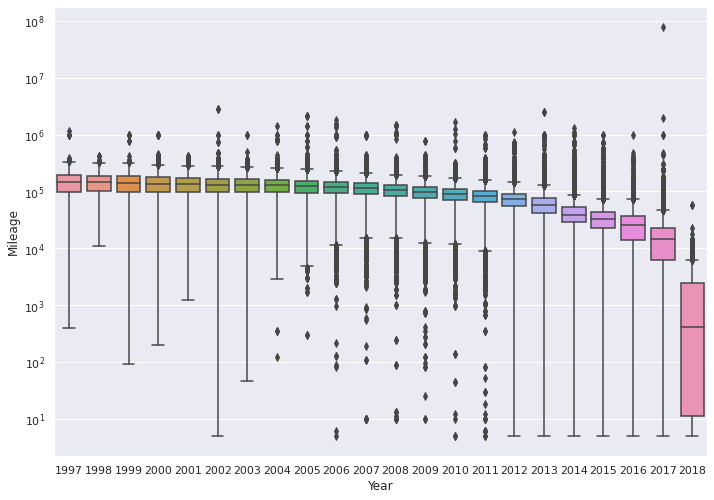

In [28]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(y = 'Mileage',data= final, x= 'Year')
plt.yscale('log')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

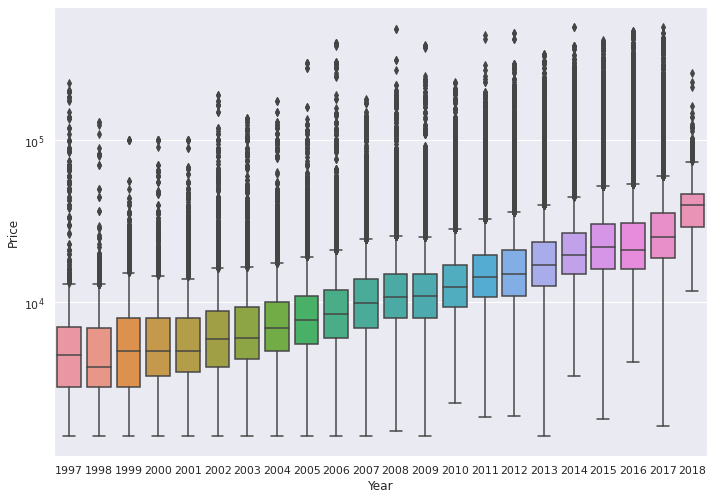

In [29]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(y = 'Price',data= final, x= 'Year')
plt.yscale('log')
plt.xlabel('Year')

Text(0.5, 0, 'Make')

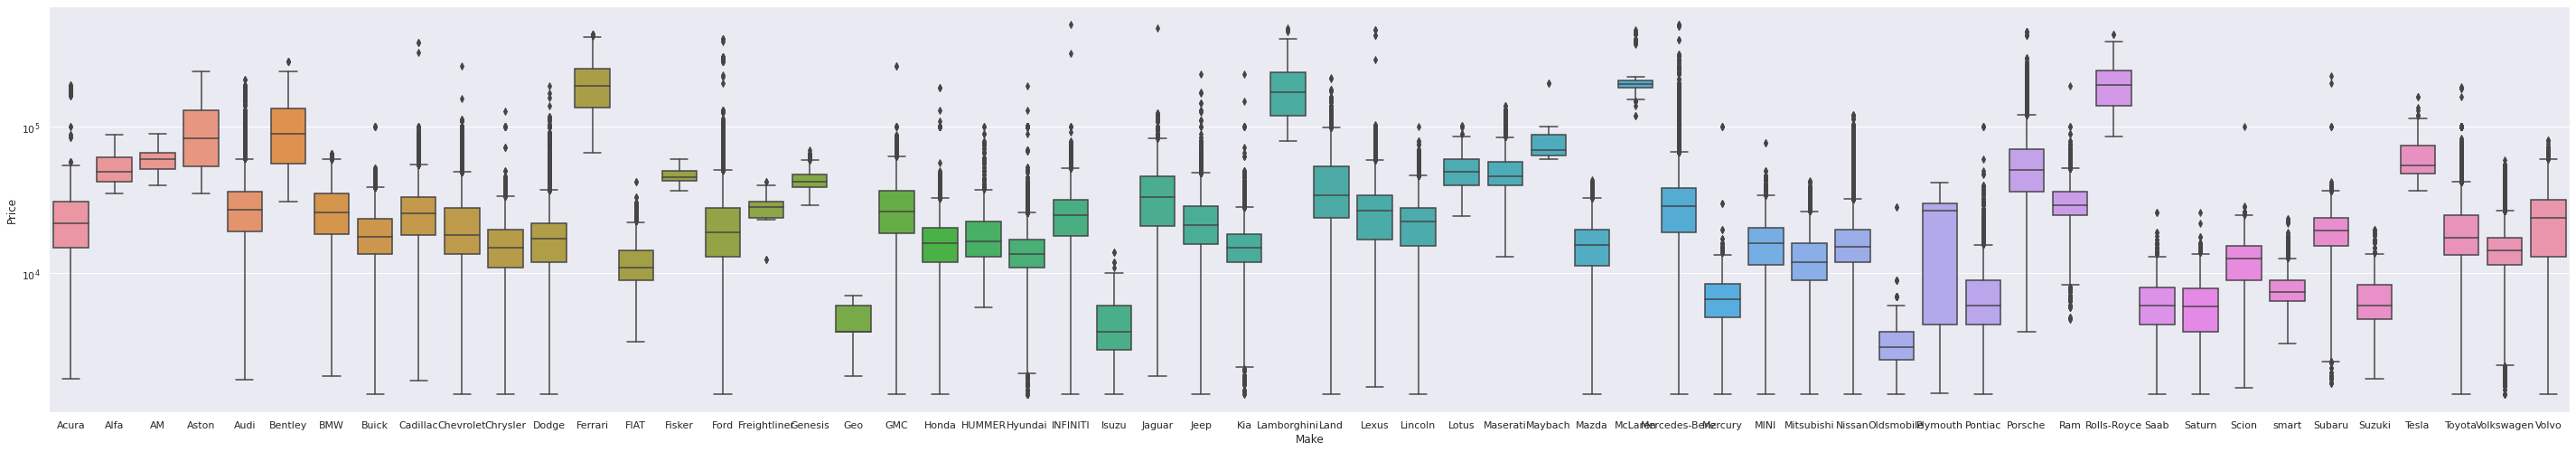

In [30]:
sns.set(rc={'figure.figsize':(50,8.27)})
sns.boxplot(y = 'Price',data= final, x= 'Make')
plt.yscale('log')
plt.xlabel('Make')

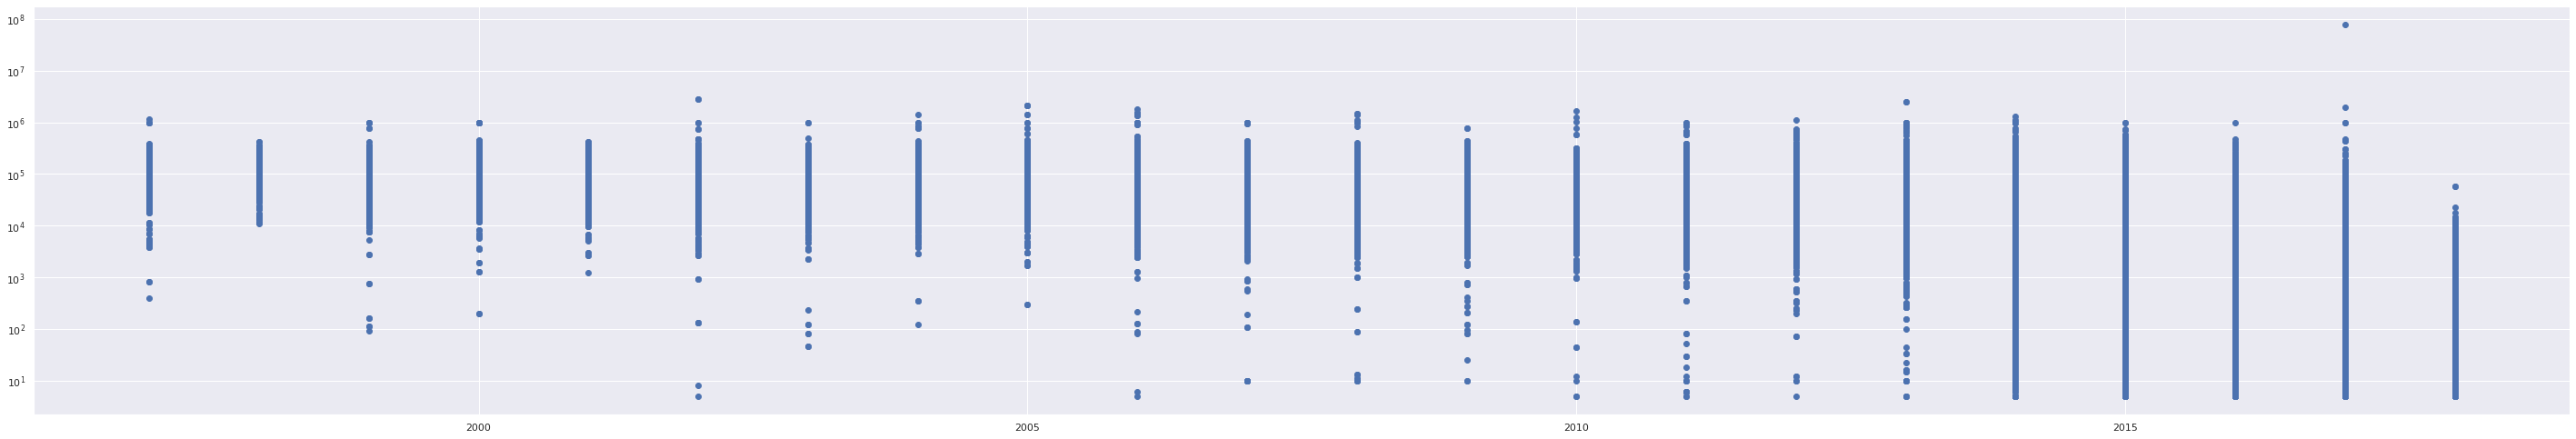

In [31]:
import matplotlib.pyplot as plt
plt.scatter(y=final['Mileage'], x = final['Year'])
plt.yscale('log')
plt.show()

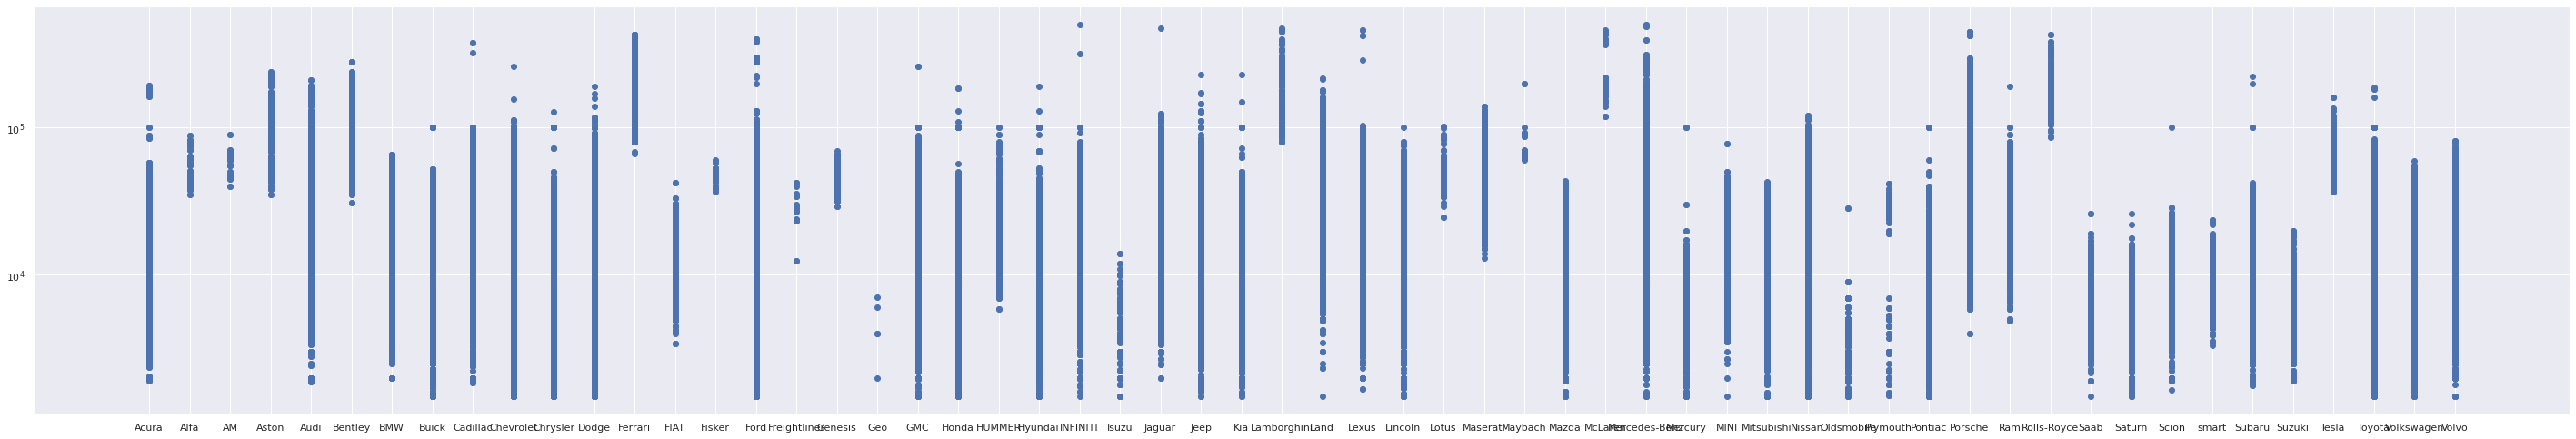

In [32]:
plt.scatter(y=final['Price'], x = final['Make'])
plt.yscale('log')
plt.show()

In [33]:
final = final.drop_duplicates(subset='Vin',keep ='first',inplace=False)

In [34]:
states = final.State.unique()
states.sort()
states

array([' AK', ' AL', ' AR', ' AZ', ' Az', ' CA', ' CO', ' CT', ' Ca',
       ' DC', ' DE', ' FL', ' Fl', ' GA', ' Ga', ' HI', ' IA', ' ID',
       ' IL', ' IN', ' KS', ' KY', ' LA', ' MA', ' MD', ' ME', ' MI',
       ' MN', ' MO', ' MS', ' MT', ' Md', ' NC', ' ND', ' NE', ' NH',
       ' NJ', ' NM', ' NV', ' NY', ' OH', ' OK', ' OR', ' Oh', ' PA',
       ' RI', ' SC', ' SD', ' TN', ' TX', ' UT', ' VA', ' VT', ' Va',
       ' WA', ' WI', ' WV', ' WY', ' ga'], dtype=object)

In [35]:
final['State']= final['State'].str.upper()

In [36]:
B=['City','State','Vin','Make','Model']
for j in B:
    final[j]= final[j].str.upper()

In [37]:
new_set = final.loc[final.Year >2013].reset_index(drop = True)
old_set = final.loc[final.Year <=2013].reset_index(drop = True)

In [38]:
th = int(final['Mileage'].quantile([0.05]))
th

6841

In [39]:
new_set = new_set[new_set['Mileage']>th]
old_set =old_set[old_set['Mileage']>th]
old_set
new_set

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,EL PASO,TX,19VDE2E53EE000083,ACURA,ILX6-SPEED
1,10999,2014,39922,WINDSOR,CO,19VDE1F71EE003817,ACURA,ILX5-SPEED
2,14799,2016,22142,LINDON,UT,19UDE2F32GA001284,ACURA,ILXAUTOMATIC
3,14490,2014,34032,GREATNECK,NY,JH4CU2F84EC002686,ACURA,TSXSPECIAL
4,17628,2015,13797,FARGO,ND,19VDE1F38FE001240,ACURA,ILX5-SPEED
...,...,...,...,...,...,...,...,...
789912,68700,2016,7480,GEORGETOWN,TX,YV4BC0PM1G1048973,VOLVO,XC90
789914,67990,2016,17032,WORCESTER,MA,YV4BC0PM1G1048827,VOLVO,XC90
789917,59375,2017,17406,BERWYN,PA,YV4A22PKXH1125723,VOLVO,XC90T6
789919,54900,2016,12637,EXETER,NH,YV4BC0PK1G1087660,VOLVO,XC90


In [40]:
new_set.drop('Vin', inplace=True, axis=1)
old_set.drop('Vin',inplace=True, axis =1)

Feature Engineering

In [41]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes("object"):
        X[colname], _ = X[colname].factorize()
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
X = final.copy()
y = X.pop("Price")
mi_scores = make_mi_scores(X, y)
plot_mi_scores(mi_scores)

KeyboardInterrupt: ignored

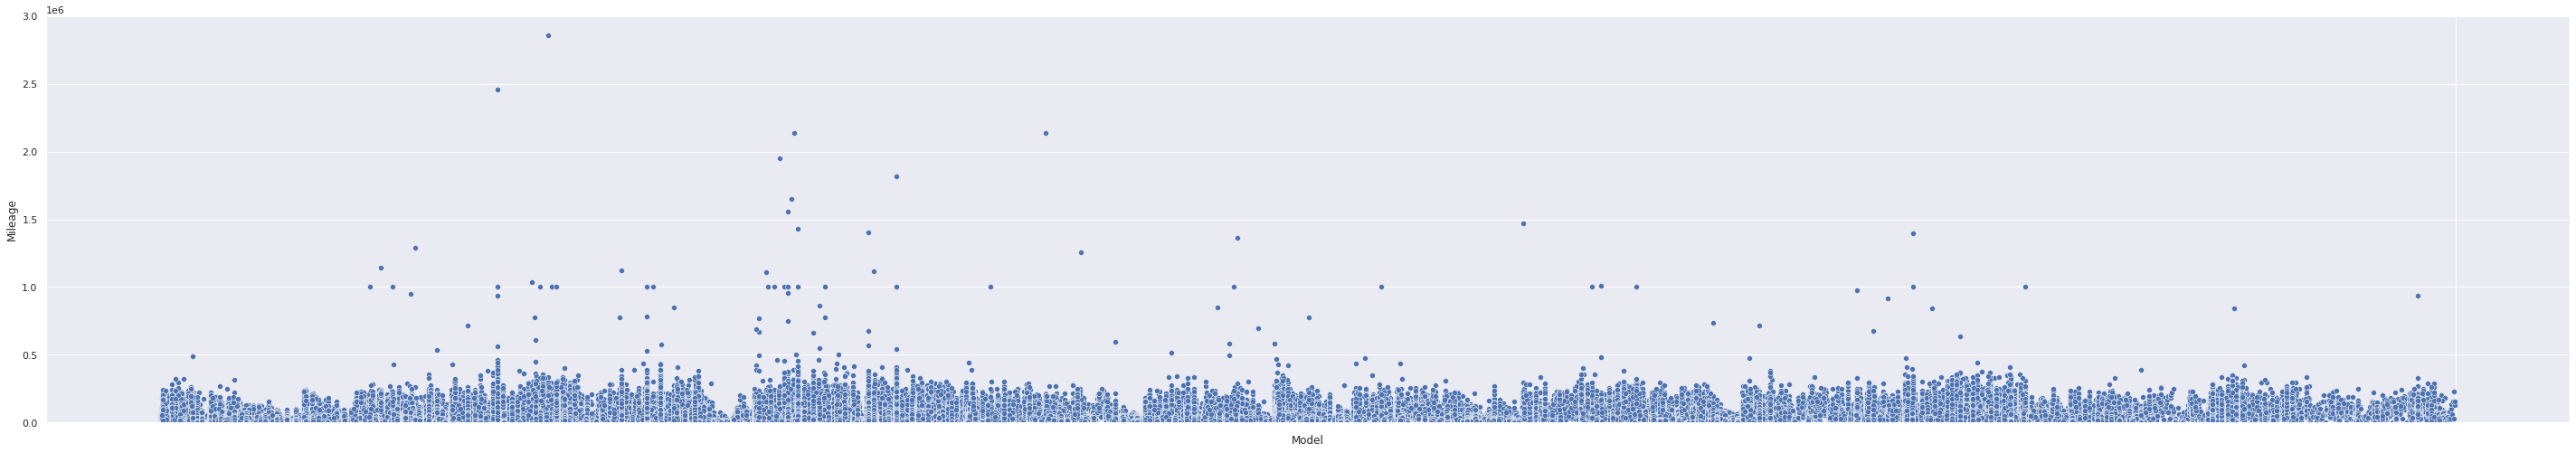

In [42]:
plot = sns.scatterplot(x="Model", y="Mileage", data=final)
plot.set(ylim=(0,3*1e6),xticklabels=[])
plt.xticks("None")
plot

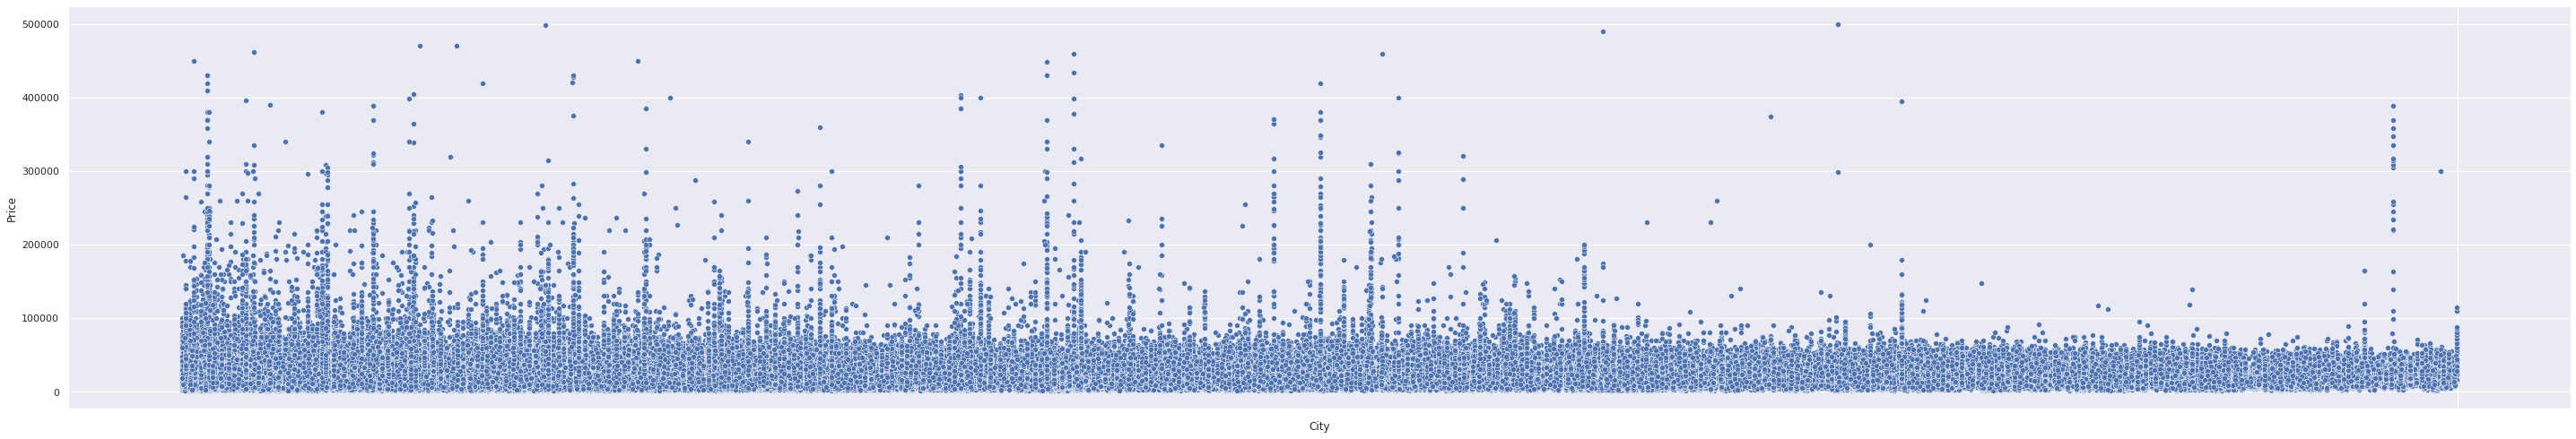

In [43]:
plot_ = sns.scatterplot(x="City", y="Price", data=final)
plot_.set(xticklabels=[])
plt.xticks("None")
plot_

Answering Question


In [44]:
count_city_old=pd.DataFrame(old_set.groupby('City')['City'].count().sort_index())
count_city_old.columns=pd.Index(['Old'])
count_city_old=count_city_old.reset_index()

# finding the number of old cars corresponding to each city that is trying to figure out number of cars corressponding to each city
count_city_new=pd.DataFrame(new_set.groupby('City')['City'].count().sort_index())
count_city_new.columns=pd.Index(['New'])
count_city_new=count_city_new.reset_index()

# taking only those cities into consideration in which both old and new cars were sold
count_city_total = count_city_old.merge(count_city_new, how="inner")  

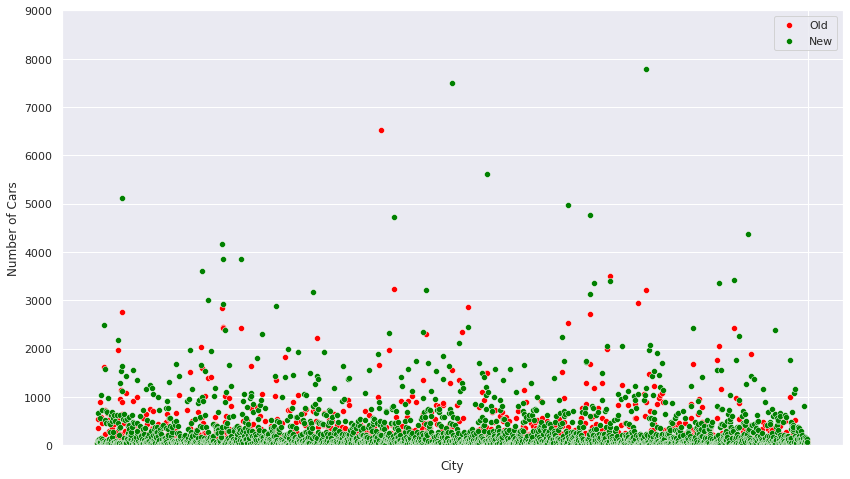

In [45]:
sns.set(rc = {'figure.figsize':(14,8)})
plot1 = sns.scatterplot(x="City", y="Old", data=count_city_total, color="red")
plot1 = sns.scatterplot(x="City", y="New", data=count_city_total, color="green")
plot1.set(ylim=(0,9000), xticklabels=[], ylabel="Number of Cars")
plt.xticks("None")
plt.legend(labels=["Old","New"])

5.2Is the distribution of the offered cars differs from the new and old ones according to the state of the seller?


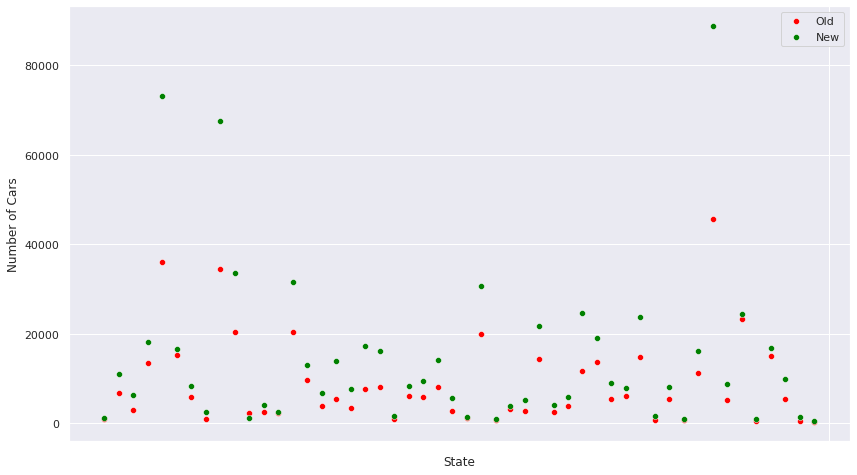

In [46]:
# determining the number of old cars corresponding to each state 
count_state_old=pd.DataFrame(old_set.groupby('State')['State'].count().sort_index())
count_state_old.columns=pd.Index(['Old'])
count_state_old=count_state_old.reset_index()

# determining the number of new cars corresponding to each state 
count_state_new=pd.DataFrame(new_set.groupby('State')['State'].count().sort_index())
count_state_new.columns=pd.Index(['New'])
count_state_new=count_state_new.reset_index()

# taking only those cities into consideration in which both old and new cars were sold
count_state_total = count_state_old.merge(count_state_new, how="inner") 

sns.set(rc = {'figure.figsize':(14,8)})
plot2 = sns.scatterplot(x="State", y="Old", data=count_state_total, color="red")
plot2 = sns.scatterplot(x="State", y="New", data=count_state_total, color="green")
plot2.set(xticklabels=[], ylabel="Number of Cars")
plt.xticks("None")
plt.legend(labels=["Old","New"])

5.3 Is There is any differences in the Price between the old and the new cars?


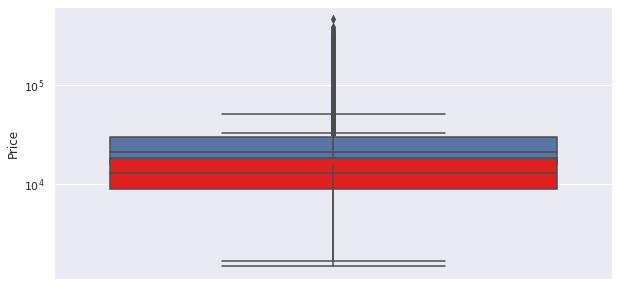

In [47]:
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(y = 'Price',data= new_set)
sns.boxplot(y= 'Price', data = old_set, color ="red")
plt.yscale('log')

5.4The Price of the car affected by the State of the seller ?

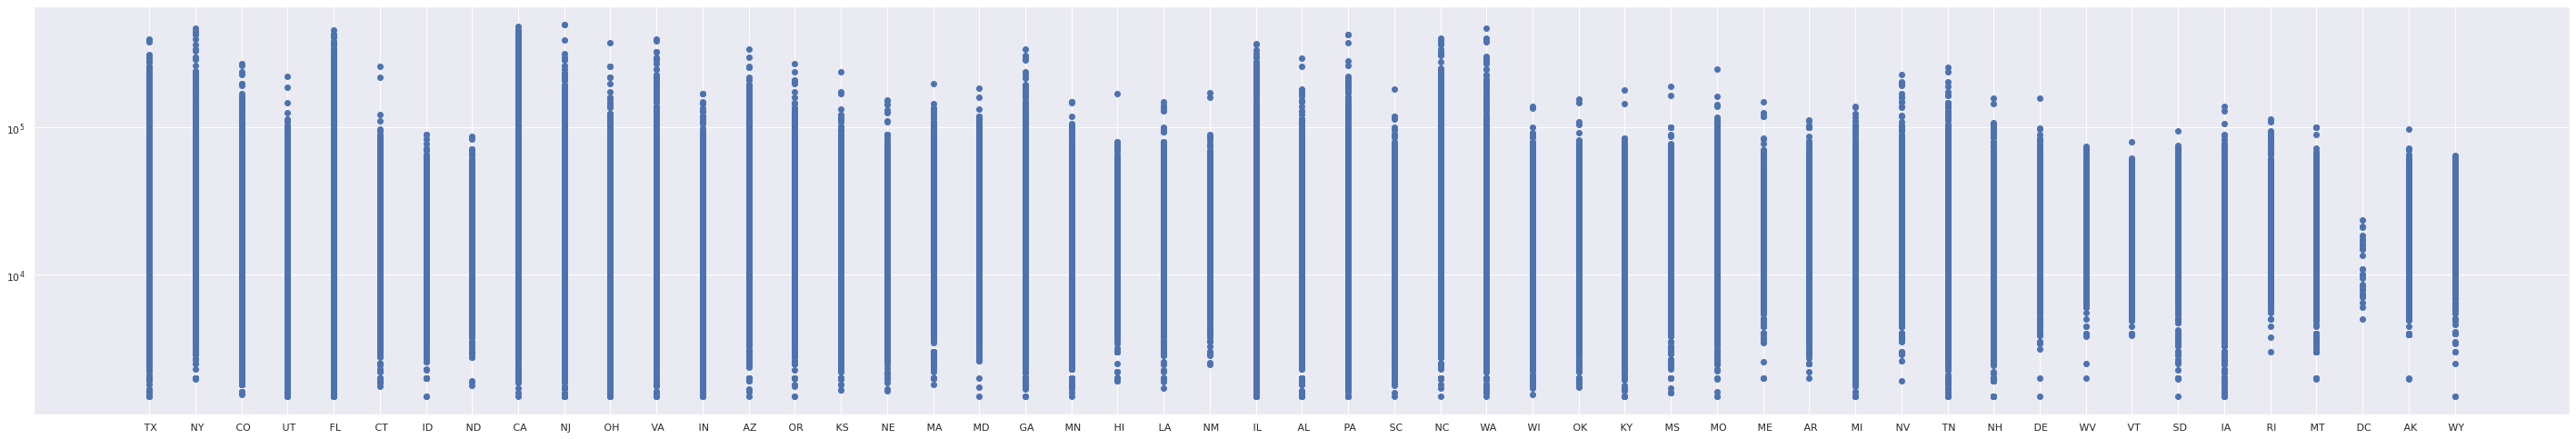

In [48]:
sns.set(rc={'figure.figsize':(50,8.27)})
plt.scatter(y=final['Price'], x = final['State'])
plt.yscale('log')
plt.show()

5.5 How the Prices of the cars are changed according to the year of manufacturing?

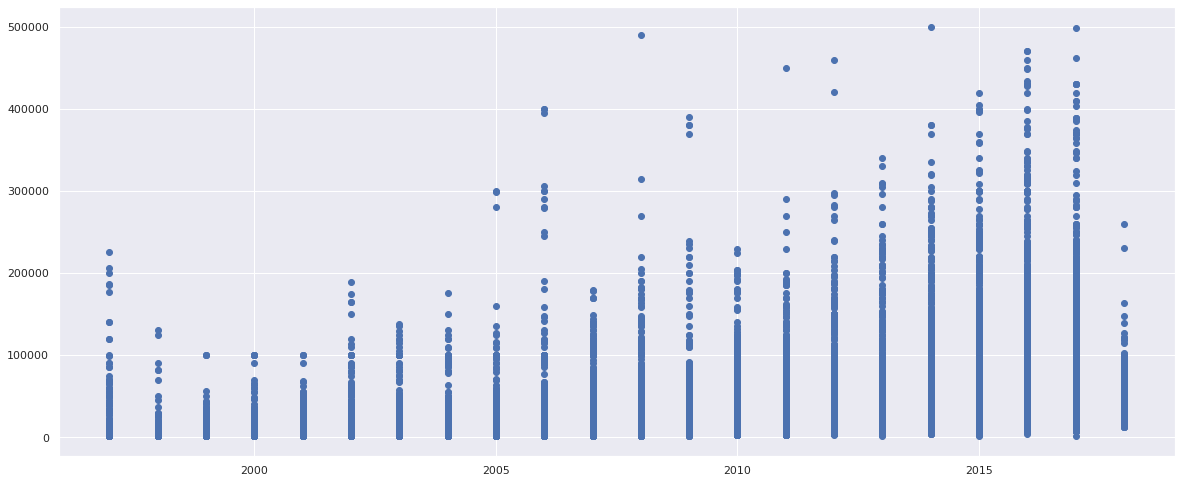

In [49]:
sns.set(rc={'figure.figsize':(20,8.27)})
plt.scatter(y=final['Price'], x = final['Year'])
plt.show()

5.6There is any relation between the Year and the Milage?

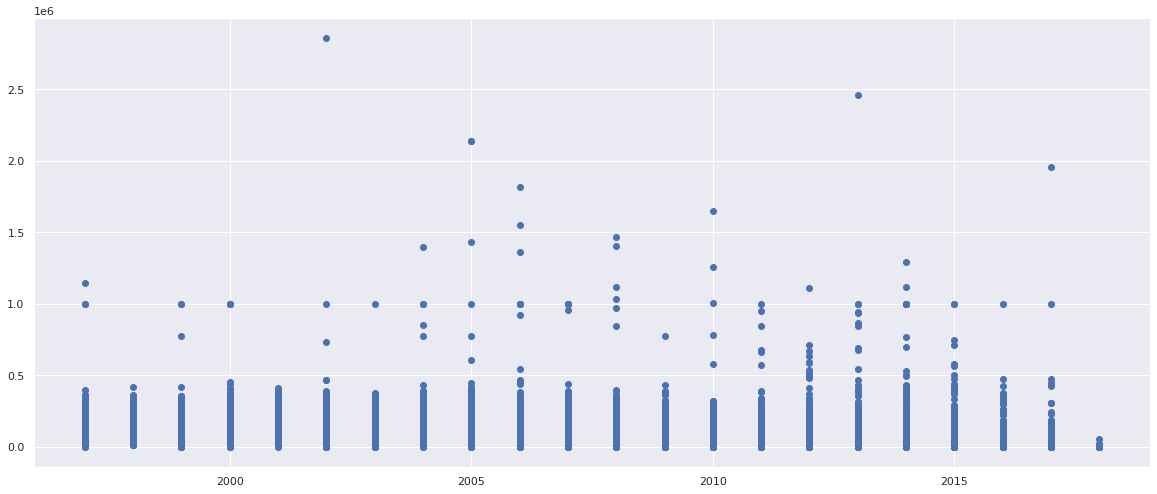

In [50]:
sns.set(rc={'figure.figsize':(20,8.27)})
plt.scatter(y=final['Mileage'], x = final['Year'])
plt.show()

5.7 What is the distribution of the cars in the market?

In [51]:
#We will try to figure out how many cars of each type are there. 
car_distribution=pd.DataFrame(final.groupby('Make')['Make'].count().sort_index())
car_distribution.columns=pd.Index(['Count'])
car_distribution=car_distribution.reset_index()

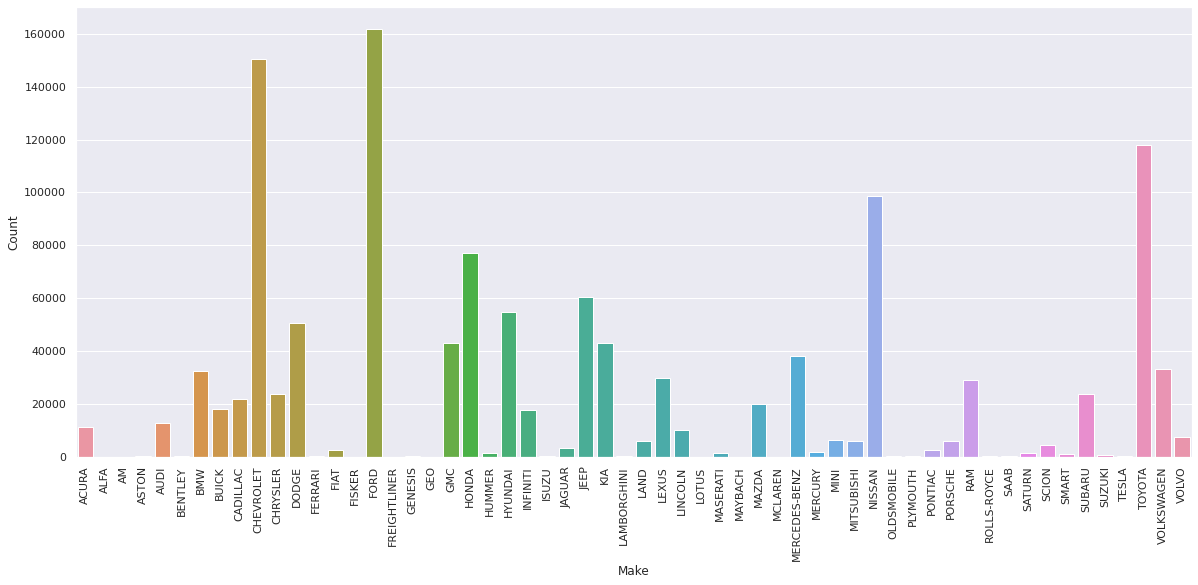

In [52]:
sns.barplot(x="Make", y="Count", data=car_distribution)
plt.xticks(rotation="vertical")
sns.set(rc={'figure.figsize':(20,8.27)})

5.8 How the Price of a certain brand cars' changes according the year of manufacturing?

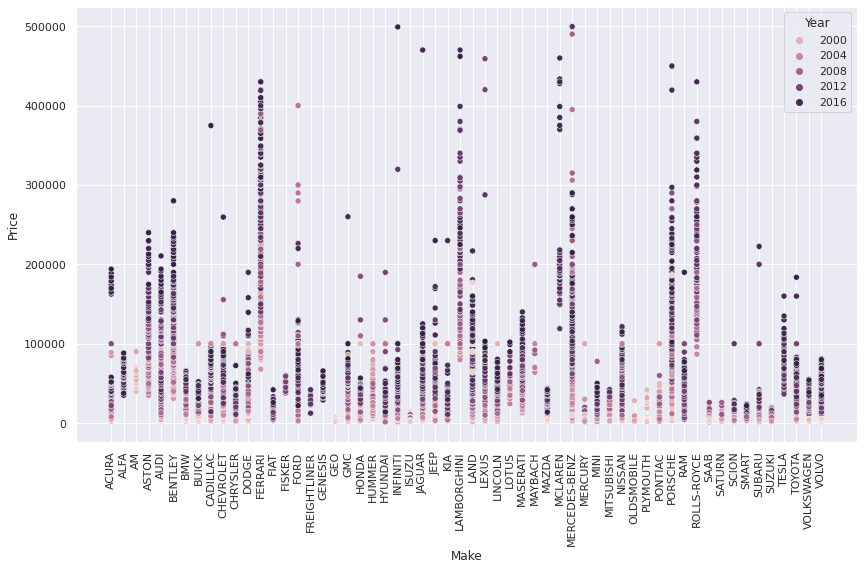

In [55]:
sns.set(rc = {'figure.figsize':(14,8)})
plt.xticks(rotation="vertical")
sns.scatterplot(x="Make", y="Price", hue="Year", data=final)
plt.show()


5.9 Is there is any relationship between Mileage, Year and Price?

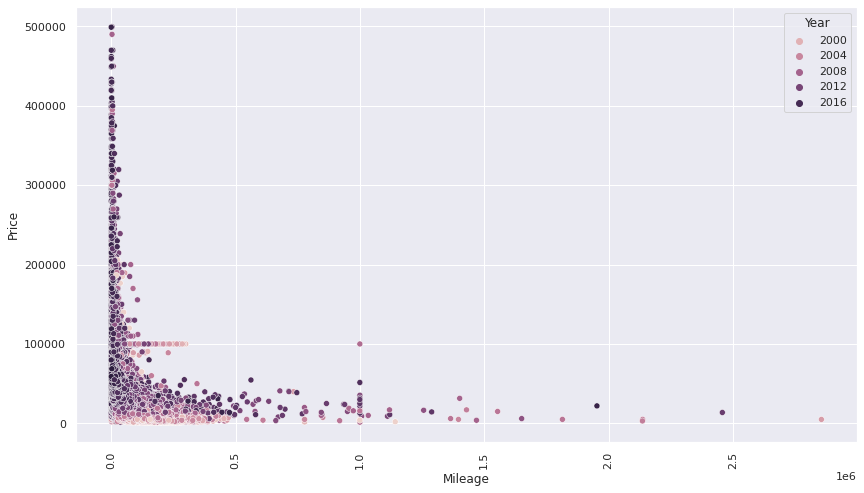

In [54]:
sns.set(rc = {'figure.figsize':(14,8)})
plt.xticks(rotation="vertical")
sns.scatterplot(x="Mileage", y="Price", hue="Year", data=final)

6. Dividing and Saving data

In [ ]:
final.to_csv("C:\Users\klvsa\Desktop\final_car_data.csv")
old_set.to_csv("C:\Users\klvsa\Desktop\old_car_data.csv")
new_set.to_csv("C:\Users\klvsa\Desktop\new_car_data.csv")